## Dataset and Problem Introduction

In this analysis, we explore alcohol consumption and policing statistics from breath alcohol test data published by Ames and Iowa State University Police Departments from January 2013 to December 2017.

Data Source: https://www.kaggle.com/yassershrief/breath-alcohol-ames-dataset
<br>Reference: https://www.datacamp.com/

In [1]:
# import pandas
import pandas as pd

# read the data into your workspace
ba_data = pd.read_csv("datasets/breath_alcohol_ames.csv")

# quickly inspect the data
print(ba_data.head())

# obtain counts for each year 
ba_year = ba_data['year'].value_counts()
ba_year

# Alternative method:
# ba_data.set_index(["year", "month", "day", "hour", "location", "gender"]).count(level="year")

   year  month  day  hour location gender   Res1   Res2
0  2017     12   17     1  Ames PD      M  0.046  0.046
1  2017     12   14     3   ISU PD      F  0.121  0.120
2  2017     12   10     5   ISU PD      F  0.068  0.067
3  2017     12   10     3   ISU PD      F  0.077  0.077
4  2017     12    9     2   ISU PD      M  0.085  0.084


2013    397
2014    344
2015    286
2016    269
2017    260
Name: year, dtype: int64

## Busiest police department in Ames
<p>There are two police departments in the data set: the Iowa State University Police Department and the Ames Police Department. Which one administers more breathalyser tests? </p>

In [2]:
# use value_counts to tally up the totals for each department
pds = ba_data['location'].value_counts()
pds

# Alternative method:
# ba_data.set_index(["year", "location", "gender"]).count(level="location")

ISU PD     940
Ames PD    616
Name: location, dtype: int64

## Breathalyser tests by hour
<p>There are inevitably some times of the day when breath alcohol tests, especially in a college town like Ames, are most and least common. Which hours of the day have the most and least breathalyser tests?  </p>

24


<AxesSubplot:xlabel='hour'>

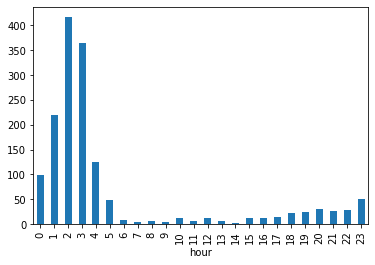

In [3]:
%matplotlib inline

# count by hour and arrange by descending frequency
# hourly = ba_data.groupby(['hour'])['location'].count().sort_values(ascending=False)
hourly = ba_data.groupby(['hour']).size()
print(len(hourly))

hourly.plot.bar(x='hour') # TODO this plot is not in decending frequency

## Breathalyser tests by month
<p>Which month has the most recorded breathalyser tests?</p>

12


<AxesSubplot:xlabel='month'>

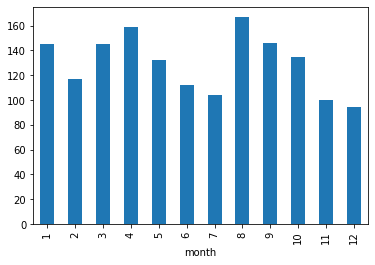

In [4]:
# count by month and arrange by descending frequency
# monthly = ba_data.groupby(['month'])['location'].count().sort_values(ascending=False)
monthly = ba_data.groupby(['month']).size()
print(len(monthly))

# use plot.bar to make the appropriate bar chart
monthly.plot.bar(x='month')

## Breathalyser tests by gender

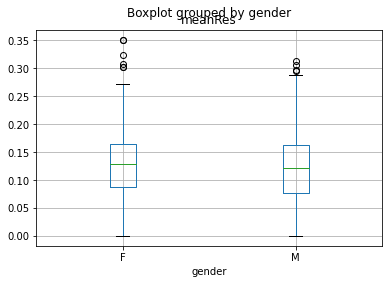

In [5]:
# count by gender (may not be relevent in this work flow)
counts_gender = ba_data['gender'].value_counts()

# create a dataset with no NAs in gender 
gen = ba_data.dropna(subset=['gender'])

# create a mean test result variable
mean_bas = gen.assign(meanRes=(gen.Res1+gen.Res2)/2)
# gen['meanRes'] = (gen.Res1+gen.Res2)/2

# create side-by-side boxplots to compare the mean blood alcohol levels of men and women
ax = mean_bas.boxplot(['meanRes'], by = 'gender')

## Driving under the influence
<p>In the USA, it is illegal to drive with a blood alcohol concentration (BAC) above 0.08%. This is the case for <a href="https://www.dmv.org/automotive-law/dui.php">all 50 states</a>. Assuming everyone tested in our data was driving (though we have no way of knowing this), if either of the results (<code>Res1</code>, <code>Res2</code>) are above 0.08, the person would be charged with DUI (driving under the influence). </p>

In [6]:
# Filter the data
duis = ba_data[(ba_data.Res1 > 0.08) | (ba_data.Res2 > 0.08)]

# proportion of tests that would have resulted in a DUI
p_dui = duis.shape[0] / ba_data.shape[0]
p_dui

0.7448586118251928

## Patterns over time
<p>We previously saw that 2am is the most common time of day for breathalyser tests to be administered, and August is the most common month of the year for breathalyser tests. Now, we look at the weeks in the year over time. </p>

In [7]:
# Create date variable
# ba_data = ba_data.assign(date = pd.to_datetime(ba_data[['year', 'month', 'day']]))
ba_data['date'] = pd.to_datetime(ba_data[['year', 'month', 'day']])

# Create a week variable
# ba_data = ba_data.assign(week= ba_data['date'].dt.week)
ba_data['week'] = ba_data['date'].dt.week

# Check your work
ba_data.head()

,year,month,day,hour,location,gender,Res1,Res2,date,week
0,2017,12,17,1,Ames PD,M,0.046,0.046,2017-12-17,50
1,2017,12,14,3,ISU PD,F,0.121,0.120,2017-12-14,50
2,2017,12,10,5,ISU PD,F,0.068,0.067,2017-12-10,49
3,2017,12,10,3,ISU PD,F,0.077,0.077,2017-12-10,49
4,2017,12,9,2,ISU PD,M,0.085,0.084,2017-12-09,49


259


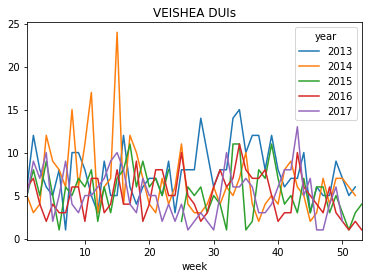

In [8]:
# create the weekly data set (most similar to original project)
# weekly1 = ba_data[['year', 'week', 'gender']]
# weekly1.groupby(['week','year']).count().unstack().plot()

# choose the variables of interest, count 
timeline = ba_data.groupby(['week','year']).count()['Res1']

# unstack and plot
#VEISHEA is an annual week-long celebration held each spring on the campus of Iowa State University in Ames, Iowa.
timeline.unstack().plot(title='VEISHEA DUIs', legend=True) 
print(len(timeline))

## The end of VEISHEA
<p>From <a href="https://en.wikipedia.org/wiki/VEISHEA">Wikipedia</a>: 
"VEISHEA was an annual week-long celebration held each spring on the campus of Iowa State University in Ames, Iowa. The celebration featured an annual parade and many open-house demonstrations of the university facilities and departments. Campus organizations exhibited products, technologies, and held fundraisers for various charity groups. In addition, VEISHEA brought speakers, lecturers, and entertainers to Iowa State. [...] VEISHEA was the largest student-run festival in the nation, bringing in tens of thousands of visitors to the campus each year."</p>
<p>This over 90-year tradition in Ames was <a href="https://www.news.iastate.edu/news/2014/08/07/veisheaend">terminated permanently</a> after <a href="https://www.desmoinesregister.com/story/news/crime-and-courts/2014/04/09/veishea-ames-car-tipping/7495935/">riots in 2014</a>, where drunk celebrators flipped over multiple vehicles and tore light poles down. This was not the first incidence of violence and severe property damage in VEISHEA's history. Did former President Leath make the right decision by cancelling VEISHEA?</p>

<AxesSubplot:title={'center':'VEISHEA Weeks'}, xlabel='week'>

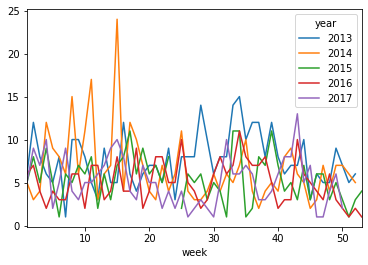

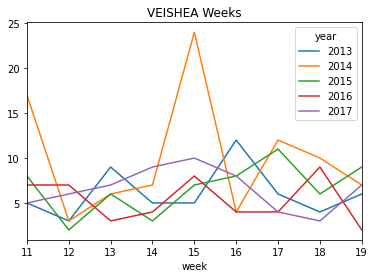

In [9]:
# ## Run this code to create the plot 
ba_data.groupby(['week','year']).count()['Res1'].unstack().plot(legend=True)

veishea= ba_data.loc[(ba_data.week < 20) & (ba_data.week > 10)]

veishea.groupby(['week','year']).count()['Res1'].unstack().plot(title='VEISHEA Weeks',legend=True) 